In [1]:
!pip install riskfolio-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Max Return Portfolio Formula
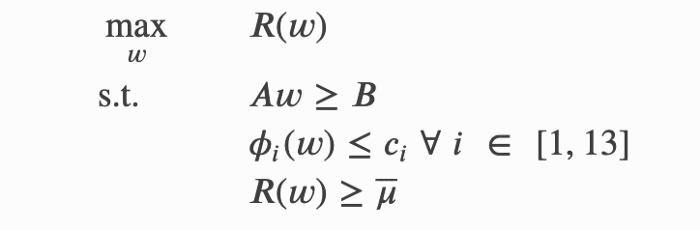

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

In [4]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4%}'.format

In [5]:
#date adjustment

start = '2019-05-26'
end = '2022-08-28'

In [6]:
assets = ['RH', 'APO', 'KKR', 'HCA', 'CTLT', 'RDNT', 'HUN', 
          'SRCL', 'SU', 'GDDY', 'FTNT']

assets.sort()

In [7]:
data = yf.download(assets, start=start, end=end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  11 of 11 completed


In [8]:
print(data)

                  APO        CTLT       FTNT       GDDY         HCA  \
Date                                                                  
2019-05-28 2718.5312%  4495.9999% 1544.8000% 7527.9999% 11953.2501%   
2019-05-29 2681.7829%  4538.9999% 1516.4000% 7404.0001% 11838.6139%   
2019-05-30 2682.6574%  4549.0002% 1521.0000% 7382.0000% 11907.5890%   
2019-05-31 2573.2862%  4550.0000% 1449.6000% 7440.0002% 11789.6530%   
2019-06-03 2617.9096%  4559.0000% 1393.0000% 7029.0001% 11991.4093%   
...               ...         ...        ...        ...         ...   
2022-08-22 5708.0002% 10236.0001% 5032.0000% 7962.9997% 21238.9999%   
2022-08-23 5809.0000% 10251.0002% 5059.0000% 7938.9999% 21025.0000%   
2022-08-24 5895.9999% 10269.0002% 5016.0000% 7991.0004% 21041.9998%   
2022-08-25 6031.0001% 10419.9997% 5086.9999% 8066.0004% 21355.9998%   
2022-08-26 5636.9999%  9969.9997% 4957.0000% 7773.0003% 20497.9996%   

                  HUN        KKR       RDNT          RH       SRCL         S

In [9]:
Y = data[assets].pct_change().dropna()

display(Y.head())

,APO,CTLT,FTNT,GDDY,HCA,HUN,KKR,RDNT,RH,SRCL,SU
Date,,,,,,,,,,,
2019-05-29,-1.3518%,0.9564%,-1.8384%,-1.6472%,-0.9590%,-1.7809%,-1.4862%,-2.3200%,-2.0643%,-0.8259%,0.0320%
2019-05-30,0.0326%,0.2203%,0.3034%,-0.2971%,0.5826%,0.1648%,0.7758%,-0.9828%,-0.7861%,-0.5698%,-0.7353%
2019-05-31,-4.0770%,0.0220%,-4.6943%,0.7857%,-0.9904%,-4.7175%,-4.7049%,-0.0827%,-2.2164%,2.2261%,-0.8051%
2019-06-03,1.7341%,0.1978%,-3.9045%,-5.5242%,1.7113%,4.0875%,1.9749%,1.1589%,1.5854%,0.7546%,-0.8167%
2019-06-04,3.2086%,2.6102%,4.0488%,1.7072%,2.0320%,6.4159%,3.7412%,3.1915%,6.4740%,1.5836%,0.0000%


In [10]:
import riskfolio.Portfolio 
import riskfolio as pf

In [11]:
port = pf.Portfolio(returns=Y)

method_mu='hist'
method_cov='hist' 
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
model='Classic'
rm = 'MV'
obj = 'Sharpe'
hist = True
rf = 0
l = 0

In [12]:
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w.T)

,APO,CTLT,FTNT,GDDY,HCA,HUN,KKR,RDNT,RH,SRCL,SU
weights,3.6422%,17.4876%,46.4988%,0.0000%,0.6956%,11.7319%,1.6431%,1.1620%,17.1388%,0.0000%,0.0000%


In [13]:
import riskfolio.PlotFunctions as plf

In [14]:
!pip3 install --upgrade --force-reinstall matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached Pillow-9.2.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.1 MB)
  Using cached fonttools-4.37.1-py3-none-any.whl (957 kB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.3.0
    Uninst

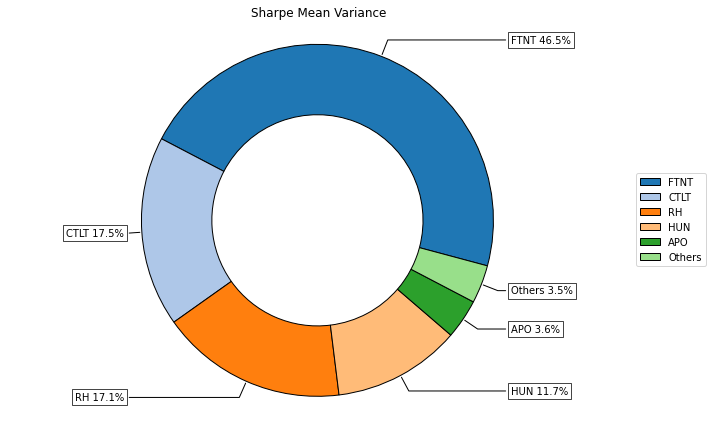

In [16]:
ax = plf.plot_pie(w=w, title='Sharpe Mean Variance', nrow=25, cmap = "tab20", height=6, width=10, ax=None)

In [17]:
points = 50
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

In [18]:
display(frontier.T.head())

,APO,CTLT,FTNT,GDDY,HCA,HUN,KKR,RDNT,RH,SRCL,SU
0,0.0000%,18.6409%,8.0510%,18.1465%,8.8379%,10.8063%,0.0000%,0.0000%,0.0000%,28.1498%,7.3676%
1,0.0000%,23.1645%,18.7311%,5.6832%,10.7276%,14.3352%,2.9801%,0.0000%,0.0000%,18.1408%,6.2373%
2,0.0000%,24.9127%,23.1247%,0.3731%,11.4717%,15.7034%,4.7877%,0.0000%,0.0000%,13.8986%,5.7280%
3,0.9396%,25.5033%,26.9650%,0.0000%,11.4946%,17.1880%,5.4036%,0.0000%,0.0000%,7.8850%,4.6207%
4,1.5572%,25.6315%,29.4563%,0.0000%,11.2366%,18.0446%,5.3842%,0.0000%,1.2077%,3.5397%,3.9421%


In [19]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

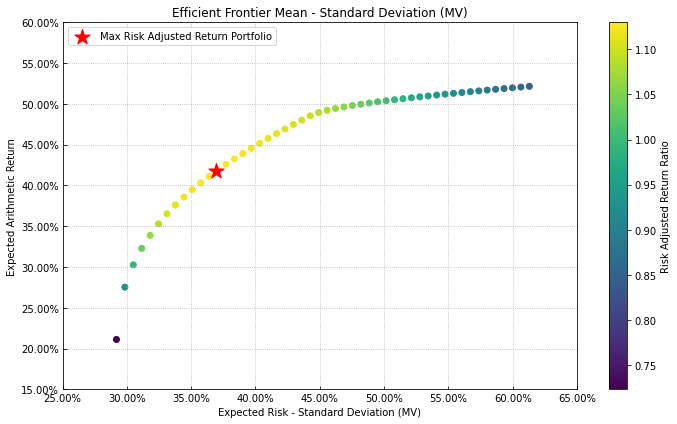

In [20]:
ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05, cmap='viridis', w=w, label=label, marker='*', s=16, c='r', height=6, width=10, ax=None)

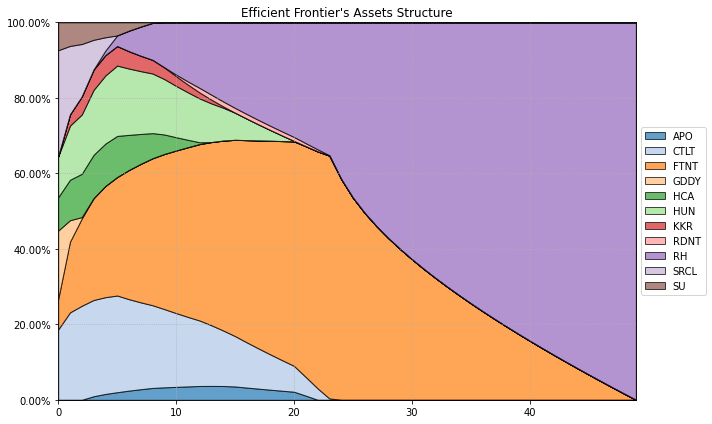

In [21]:
ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [22]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)

w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APO,3.64%,3.62%,3.01%,3.41%,2.80%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CTLT,17.49%,8.41%,18.09%,9.01%,18.76%,38.03%,16.66%,21.86%,5.84%,22.99%,12.36%,16.83%,0.00%
FTNT,46.50%,42.20%,49.83%,40.95%,50.09%,38.37%,67.32%,70.54%,94.16%,42.83%,77.02%,66.98%,96.78%
GDDY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
HCA,0.70%,4.18%,0.35%,6.49%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
HUN,11.73%,8.96%,6.26%,6.61%,5.99%,0.00%,0.00%,0.00%,0.00%,10.37%,6.40%,12.71%,3.22%
KKR,1.64%,9.67%,0.30%,9.38%,0.00%,0.00%,0.00%,0.00%,0.00%,2.15%,0.00%,0.00%,0.00%
RDNT,1.16%,5.99%,0.00%,5.49%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
RH,17.14%,16.85%,22.15%,16.85%,22.36%,23.60%,16.03%,7.60%,0.00%,7.23%,0.00%,0.00%,0.00%
SRCL,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [23]:
import matplotlib.pyplot as plt

<AxesSubplot:>

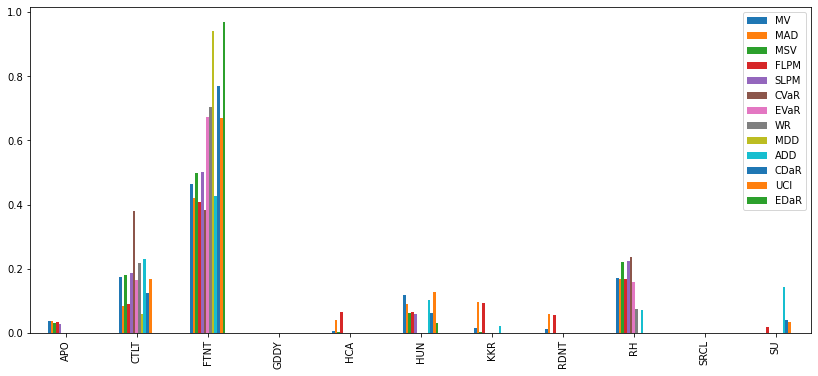

In [24]:
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)